In [10]:
using Plots
using Random
using StatsBase

best_route = nothing
best_length = Inf
first_length = Inf
routes = nothing
lengths_history = Float64[]

n = 20
N = 30
alpha = 1.0
beta = 5.0
rho = 0.5
Q = 100.0
iterations = 100
last_iter = 0

tetta = ones(Float64, n, n) * 0.000001
cities = rand(n, 2) * 100

d = zeros(Float64, n, n)
for i in 1:n
    for j in 1:n
        if i != j
            d[i, j] = sqrt(sum((cities[i, :] .- cities[j, :]).^2))
        else
            d[i, j] = Inf
        end
    end
end

function choose_next_city(i, visited, tetta, d)
    p = zeros(Float64, n)
    cities = setdiff(1:n, visited)
    if isempty(cities)
        return nothing
    end
    for j in cities
        p[j] = (tetta[i, j]^alpha) / (d[i, j]^beta)
    end
    p ./= sum(p[cities])
    return sample(cities, Weights(p[cities]))
end

last_best_length = Inf
k = 0

for iteration in 1:iterations
    routes = Vector{Vector{Int}}()
    Ls = Float64[]

    if last_best_length == best_length
        k += 1
    else
        k = 0
        last_best_length = best_length
    end

    if k == 5
        last_iter = iteration
        break
    end

    for ant in 1:N
        visited = [rand(1:n)]
        this_way = copy(visited)
        while length(visited) < n
            next_city = choose_next_city(visited[end], visited, tetta, d)
            push!(this_way, next_city)
            push!(visited, next_city)
        end
        push!(this_way, this_way[1])
        push!(routes, this_way)

        L = 0.0
        for i in 1:(length(this_way)-1)
            L += d[this_way[i], this_way[i+1]]
        end
        push!(Ls, L)

        if iteration == 1
            first_length = L
        end
        if L < best_length
            best_length = L
            best_route = copy(this_way)
        end
    end

    tetta .*= (1 - rho)
    for ant in 1:N
        this_way = routes[ant]
        L = Ls[ant]
        for i in 1:(length(this_way)-1)
            tetta[this_way[i], this_way[i+1]] += Q / L
        end
    end

    push!(lengths_history, best_length)
end

p1 = plot(title="Исходный маршрут", legend=false)
plot!([(cities[i, 1], cities[i, 2]) for i in 1:n])
scatter!(cities[:, 1], cities[:, 2], color=:red, markersize=5)
for i in 1:n
    annotate!(cities[i, 1]-2, cities[i, 2]+2, text(string(i), :black, :center, 10))
end

p2 = plot(lengths_history, title="Сходимость муравьиной системы",
         label="Длина лучшего маршрута", xlabel="Итерация", ylabel="Длина")

p3 = plot(title="Конечный лучший маршрут", legend=false)
for i in 1:(length(best_route)-1)
    city1, city2 = best_route[i], best_route[i+1]
    plot!([cities[city1, 1], cities[city2, 1]],
         [cities[city1, 2], cities[city2, 2]], color=:blue)
end
scatter!(cities[:, 1], cities[:, 2], color=:red, markersize=5)
for i in 1:n
    annotate!(cities[i, 1]-2, cities[i, 2]+3, text(string(i), :black, :center, 10))
end

println("Алгоритм сошёлся на поколении ", last_iter)

Алгоритм сошёлся на поколении 19


Длина исходного маршрута: 533.5714688992214


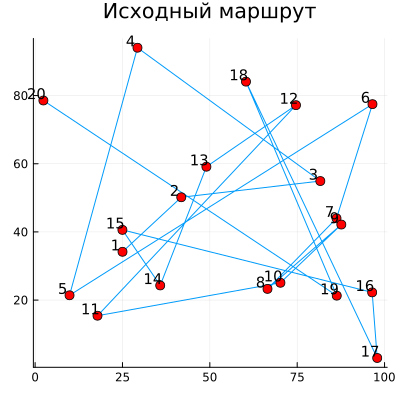

In [11]:
println("Длина исходного маршрута: ", first_length)
plot(p1, layout=(1, 1), size=(400, 400))

Длина лучшего маршрута: 409.42419200033106


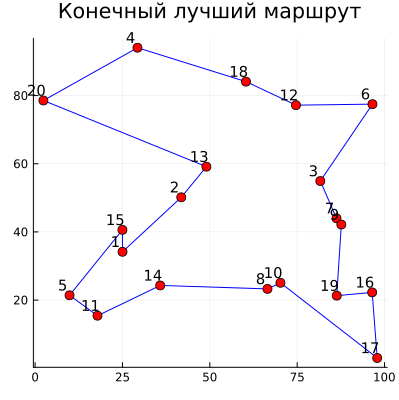

In [12]:
println("Длина лучшего маршрута: ", best_length)
plot(p3, layout=(1, 1), size=(400, 400))

In [ ]:
plot(p2, layout=(1, 1), size=(400, 400))